In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from simpleparamaterisation import TPCevt as TPC
from scipy.stats import multivariate_normal

det = TPC.Detector("Simple TPC with Atmospheric Ar (default values)")

Welcome to JupyROOT 6.28/00


In [2]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('open', 152),
 ('TPC', 72),
 ('np', 72),
 ('pd', 72),
 ('plt', 72),
 ('det', 56),
 ('multivariate_normal', 56)]

In [3]:
def coordinate_to_grid_index(a, delta):
    return int((a + delta / 2) // delta)

In [4]:
coord_loc = np.array([0.8, 2.6])
delta = 1
std = 100
rv = multivariate_normal([0,0], np.diag([std, std]))

grid_index = np.array([coordinate_to_grid_index(coord_loc[0], delta),
                    coordinate_to_grid_index(coord_loc[1], delta)
                    ])

print("grid index: ", grid_index)
offset = coord_loc-grid_index
print("distance to center of the grid: ", offset)

grid index:  [1 3]
distance to center of the grid:  [-0.2 -0.4]


In [5]:
print(det.PSFstd)

0.01


(2, 201, 201)
(201, 201, 2)


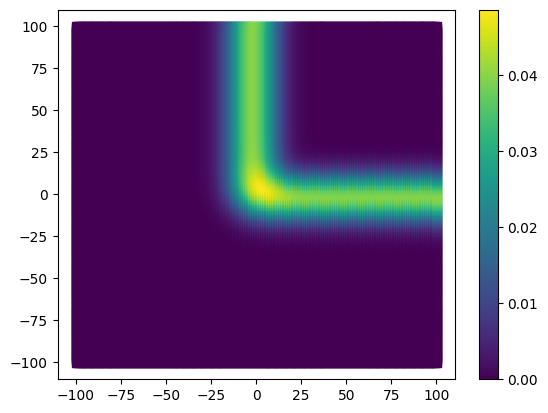

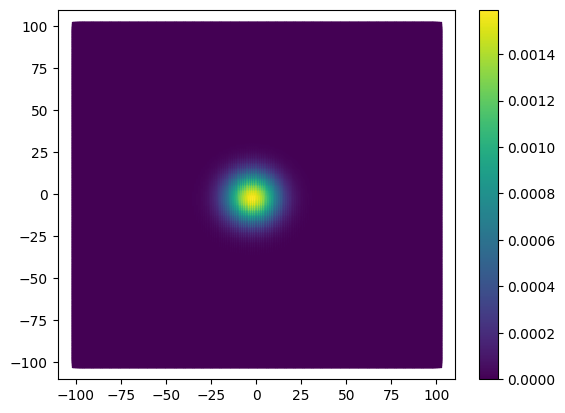

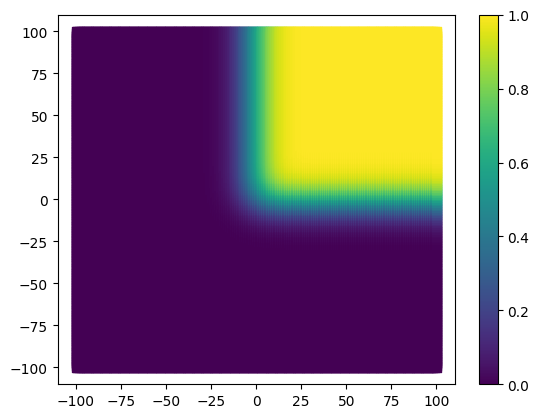

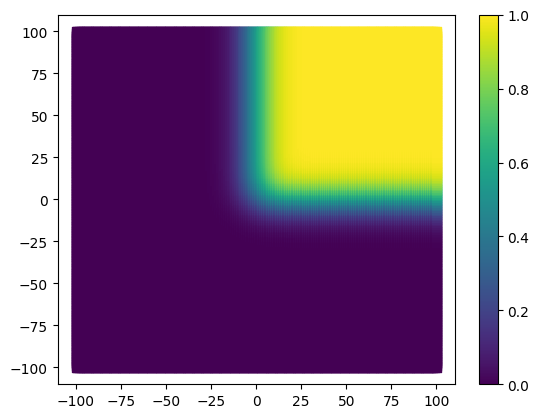

In [6]:
grid_size = 100
gain = 1

local_coordinate = np.mgrid[-grid_size*delta:(grid_size+1)*delta:1*delta,
                            -grid_size*delta:(grid_size+1)*delta:1*delta
                            ]
print(local_coordinate.shape)
pos = np.stack(local_coordinate, axis=-1)
print(pos.shape)

upper = rv.cdf(pos+delta/2)
lower = rv.cdf(pos-delta/2)

val_pdf = rv.pdf(pos)*gain
val_cdf = (upper-lower)*gain

plt.figure(0)
plt.scatter(local_coordinate[0], local_coordinate[1], c=val_cdf, marker='s')
plt.colorbar()

plt.figure(1)
plt.scatter(local_coordinate[0], local_coordinate[1], c = val_pdf, marker='s')
plt.colorbar()


plt.figure(2)
plt.scatter(local_coordinate[0], local_coordinate[1], c = upper, marker='s')
plt.colorbar()

plt.figure(3)
plt.scatter(local_coordinate[0], local_coordinate[1], c = lower, marker='s')
plt.colorbar()

[[[-10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10 -10
   -10 -10 -10 -10]
  [ -9  -9  -9  -9  -9  -9  -9  -9  -9  -9  -9  -9  -9  -9  -9  -9  -9
    -9  -9  -9  -9]
  [ -8  -8  -8  -8  -8  -8  -8  -8  -8  -8  -8  -8  -8  -8  -8  -8  -8
    -8  -8  -8  -8]
  [ -7  -7  -7  -7  -7  -7  -7  -7  -7  -7  -7  -7  -7  -7  -7  -7  -7
    -7  -7  -7  -7]
  [ -6  -6  -6  -6  -6  -6  -6  -6  -6  -6  -6  -6  -6  -6  -6  -6  -6
    -6  -6  -6  -6]
  [ -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5  -5
    -5  -5  -5  -5]
  [ -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4  -4
    -4  -4  -4  -4]
  [ -3  -3  -3  -3  -3  -3  -3  -3  -3  -3  -3  -3  -3  -3  -3  -3  -3
    -3  -3  -3  -3]
  [ -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2  -2
    -2  -2  -2  -2]
  [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
    -1  -1  -1  -1]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0]

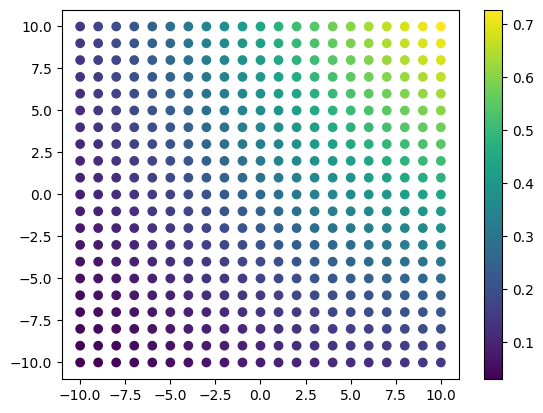

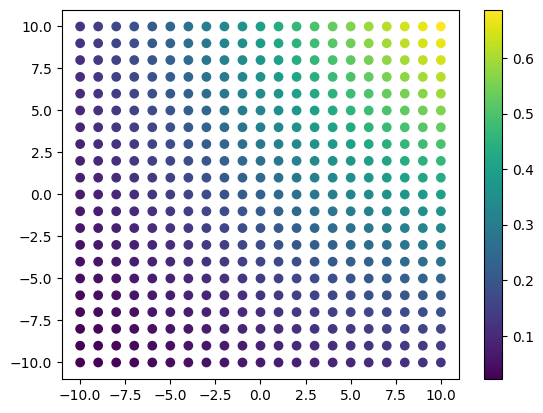

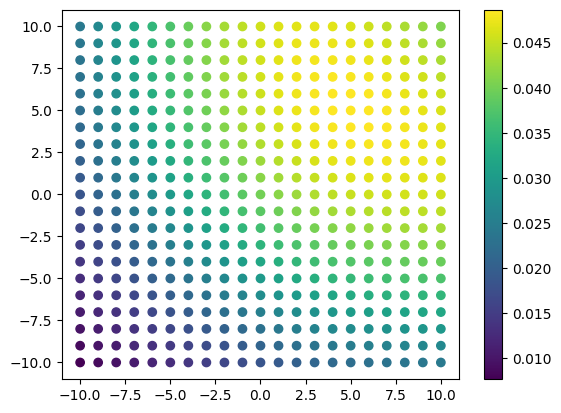

In [7]:
grid_size = 10
gain = np.random.exponential(scale=det.gain_mean)

local_grid = np.mgrid[-grid_size*delta:(grid_size+1)*delta:1*delta,
                            -grid_size*delta:(grid_size+1)*delta:1*delta
                            ]
print(local_grid)
upper = np.stack(local_grid+delta/2, axis=-1)
lower = np.stack(local_grid-delta/2, axis=-1)
# print('upper', upper)
# print('lower', lower)

val = rv.cdf(upper) - rv.cdf(lower)
print(val.shape)

plt.figure(0)
plt.scatter(local_grid[0], local_grid[1], c=rv.cdf(upper))
plt.colorbar()

plt.figure(1)
plt.scatter(local_grid[0], local_grid[1], c=rv.cdf(lower))
plt.colorbar()

plt.figure(2)
plt.scatter(local_grid[0], local_grid[1], c=rv.cdf(upper) - rv.cdf(lower))
plt.colorbar()

[-100 -100]
[-99.5 -99.5]
1.5899093176584128e-46
[-100.5 -100.5]
2.1099057524540497e-47
[[1.37891874e-46 3.74222446e-46 1.00557107e-45 ... 8.01578959e-24
  8.01578959e-24 8.01578959e-24]
 [3.74222446e-46 1.01557822e-45 2.72890615e-45 ... 2.16628272e-23
  2.16628272e-23 2.16628272e-23]
 [1.00557107e-45 2.72890615e-45 7.33256649e-45 ... 5.79621471e-23
  5.79621471e-23 5.79621471e-23]
 ...
 [8.01578959e-24 2.16628272e-23 5.79621471e-23 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.01578959e-24 2.16628272e-23 5.79621471e-23 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.01578959e-24 2.16628272e-23 5.79621471e-23 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


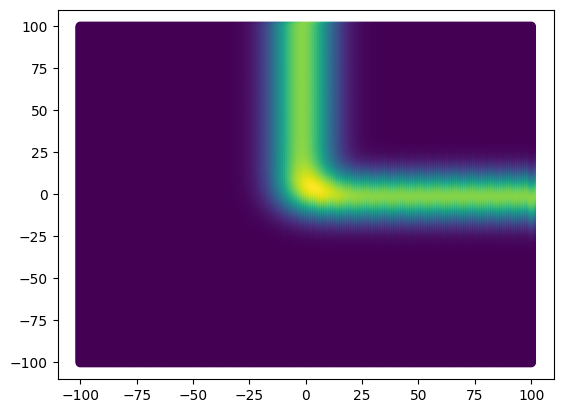

In [8]:
grid_size = 100
gain = np.random.exponential(scale=det.gain_mean)

local_grid = np.mgrid[-grid_size*delta:(grid_size+1)*delta:1*delta,
                            -grid_size*delta:(grid_size+1)*delta:1*delta
                            ]
# print(local_grid)
position = np.stack((local_grid), axis=-1)
# print(position)
print(position[0][0])

upper = position + delta/2
upper_value = rv.cdf(upper)
print(upper[0][0])
print(upper_value[0][0])


lower = position - delta/2
lower_value = rv.cdf(lower)
print(lower[0][0])
print(lower_value[0][0])

print(upper_value-lower_value)

plt.scatter(local_grid[0], local_grid[1], c = upper_value - lower_value)

In [19]:
grid_size = 100
gain = np.random.exponential(scale=det.gain_mean)

local_grid = np.mgrid[-grid_size*delta:(grid_size+1)*delta:1*delta,
                            -grid_size*delta:(grid_size+1)*delta:1*delta
                            ]
# print(local_grid)
position = np.stack((local_grid), axis=-1)
print(position.shape)
print(position[0][0])
print(position[200][200])
print(rv.cdf(position[200][200]))
print(rv.cdf(position[100][200]))
print(rv.cdf(position[200][100]))

# upper = position + delta/2
# upper_value = rv.cdf(upper)
# print(upper[0][0])
# print(upper_value[0][0])


# lower = position - delta/2
# lower_value = rv.cdf(lower)
# print(lower[0][0])
# print(lower_value[0][0])

# print(upper_value-lower_value)

(201, 201, 2)
[-100 -100]
[100 100]
1.0
0.5
0.5


(101, 101, 2)
[-50 -50]
[-50.  -50.5]
[-50.5 -50. ]
[-50.5 -50.5]


(-55.0, 55.0, -55.0, 55.0)

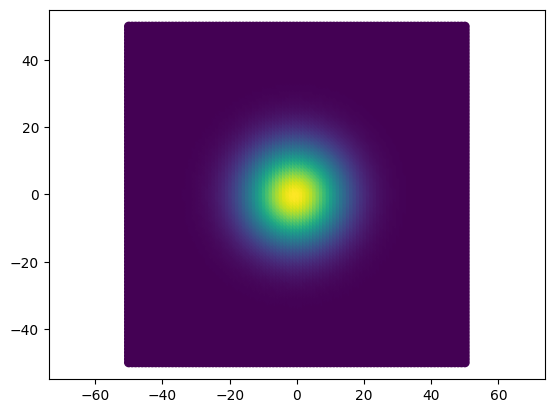

In [35]:

gain = np.random.exponential(scale=det.gain_mean)

local_grid = np.mgrid[-grid_size*delta:(grid_size+1)*delta:1*delta,
                            -grid_size*delta:(grid_size+1)*delta:1*delta
                            ]
# print(local_grid)
position = np.stack((local_grid), axis=-1)
print(position.shape)

bottom = np.stack((np.array([local_grid[0], local_grid[1]-delta/2])), axis=-1)
left = np.stack((np.array([local_grid[0]-delta/2, local_grid[1]])), axis=-1)
bottom_left = np.stack((np.array([local_grid[0]-delta/2, local_grid[1]-delta/2])), axis=-1)

print(position[0][0])
print(bottom[0][0])
print(left[0][0])
print(bottom_left[0][0])
val = rv.cdf(position) - rv.cdf(bottom) - rv.cdf(left) + rv.cdf(bottom_left)

plt.scatter(local_grid[0], local_grid[1], c=val)
plt.axis('equal')

In [ ]:
def getDistribution(coord_loc, grid_size):
    grid_index = np.array([coordinate_to_grid_index(coord_loc[0], delta),
                    coordinate_to_grid_index(coord_loc[1], delta)
                    ])
    offset = coord_loc-grid_index
    # Generate Local Grid
    rv = multivariate_normal(offset, np.diag([std, std]))

    local_grid = np.mgrid[-grid_size*delta:(grid_size+1)*delta:1*delta,
                                -grid_size*delta:(grid_size+1)*delta:1*delta
                                ]

    position = np.stack((local_grid), axis=-1)
    bottom = np.stack((np.array([local_grid[0], local_grid[1]-delta/2])), axis=-1)
    left = np.stack((np.array([local_grid[0]-delta/2, local_grid[1]])), axis=-1)
    bottom_left = np.stack((np.array([local_grid[0]-delta/2, local_grid[1]-delta/2])), axis=-1)

    gain = np.random.exponential(scale=det.gain_mean)
    val = (rv.cdf(position) - rv.cdf(bottom) - rv.cdf(left) + rv.cdf(bottom_left))*gain

    plt.scatter(local_grid[0], local_grid[1], c=val)
    plt.axis('equal')
    plt.xlim(-100,100)
    plt.ylim(-100,100)  
    
    return local_grid[0], local_grid[1], val

coord_loc_1 = np.array([0.8, 2.6])
grid_size = 100
x_1, y_1, readout_1 = getDistribution(coord_loc_1, grid_size)
